In [ ]:
# FILEID = "1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG"
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MIfunctions.py && rm -rf /tmp/cookies.txt
# FILEID = "1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh"
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O modCSP.py && rm -rf /tmp/cookies.txt
# FILEID = "1A2a60KUPxtUboqlb8B6Q0U-OygVmS_wK"
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O CKA_keras.py && rm -rf /tmp/cookies.txt > /dev/null
!pip install gcpds
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git
FILEID = "121RAmnPo8lMxvEywEkT2wyFJNTaticlD" 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O EEGFeatExtraction.py && rm -rf /tmp/cookies.txt !pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git 
!pip install mne
# librerias para sklearn SFS
# !pip install -U scikit-learn

     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 6.9 MB 10.5 MB/s 
  Created wheel for gcpds-entropies: filename=gcpds_entropies-0.1a0-py3-none-any.whl size=6450 sha256=67dc47a6e60b29037d9d01450207ca06a5895ded53739a4a272fb426a3e1f55a
  Stored in directory: /root/.cache/pip/wheels/98/7c/73/bce208f6a9a5bcb9dedc4105f08ebcb09552f4fdf8588d3504
Successfully built gcpds-entropies
  Cloning https://github.com/UN-GCPDS/python-gcpds.filters.git to /tmp/pip-req-build-8wg67aty
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.filters.git /tmp/pip-req-build-8wg67aty
  Created wheel for gcpds-filters: filename=gcpds_filters-0.1a0-py3-none-any.whl size=817588 sha256=a0146ac857e5f934ce3c83c2b181780513ea7f7c785b8a3dc1d15fa3cb0ed5a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-n2ldsbfu/wheels/36/7a/78/d27d0f0c7be2222e2c76dcafd6840212fbc620d24f8a7c13f0
Successfully built gcpds-filters
--2021-08-10 04:41:14--  https://docs.google.co

In [ ]:
# Libreria
from gcpds.filters.spatial import small_laplacian
from gcpds.utils import loaddb
import mne
from mne.preprocessing import ICA
from google.colab import drive
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import pickle
from ipywidgets import interact_manual
from ipywidgets import interact
# from MIfunctions import *
# from CKA_keras import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from time import time
import os
import mne
import numpy as np
from numpy import angle, sin, cos, sqrt
from scipy.io import loadmat
# from mat73 import loadmat
import scipy as sp
from scipy.io import savemat
from scipy.signal import butter, lfilter, welch, hanning, filtfilt, hilbert
import matplotlib.pyplot as plt

In [ ]:
## resting data
# Subjects= np.arange(1,1)
Subjects = list(np.arange(1,2))
Subjects2= [1,2,3,17,18,19]
channels = ['Fp1','Fp2','F7','F3','Fz','F4','F8','T3','C3','Cz','C4','T4',
            'T5','P3','Pz','P4','T6','O1','O2']
n_channels = len(channels)
sampling_freq  = 1000         # Frecuencia de muestreo de la base de datos.

load_path = '/content/drive/Shareddrives/GCPDS/databases/Auditory_processing/'
ch_names = channels
y = list()
method = 'fastica'
data_ref = list()
for s in Subjects:
  S_ERP = loadmat(load_path + f"P"+str(s)+"_BCMI_frontHN_2017.mat")
  print('sujeto: ', s)
  data = S_ERP['base']
  data = np.transpose(data, (1,0)) # transponer en canales x tiempo
  data = data[:n_channels,10*sampling_freq:-10*sampling_freq]
  data_target = np.zeros((1,data.shape[0],data.shape[1]))
  data_target[0,:,:] = data

  for ch in range(n_channels):
    if ch_names[ch][0] == ' ':
      ch_names[ch] = ch_names[ch][1:]

  # structure 
  ch_types = ['eeg']*n_channels
  info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
  info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)

  # Repairing artifacts with ICA
  # ica.plot_sources(raw, show_scrollbars=False)
  
  # ica = ICA(n_components=19, method=method,max_iter='auto', random_state=0)
  # ica.fit(raw,)
  # ica.exclude = [11,12,16]  # indices chosen based on various plots above sujeto 2
  # ica.exclude = [5,6,13,16]  # indices chosen based on various plots above sujeto 7
  # # ica.plot_components()
  # # ica.plot_sources(raw, show_scrollbars=False,)
  # ica.apply(raw)
  
  # CAR common average reference
  rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  data_ref.append(rereferenced_raw.get_data())
  
  # filter small laplacian 
  # lab = small_laplacian(data_target,ch_names,'standard_1005')
  # data_ref.append(lab)

sujeto:  1
Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


# Filter

In [ ]:
#filtering functions
def butter_bandpass(lowcut, highcut, fs, order=4):
  #lowcut is the lower bound of the frequency that we want to isolate
  #hicut is the upper bound of the frequency that we want to isolate
  #fs is the sampling rate of our data
  nyq = 0.5 * fs #nyquist frequency - see http://www.dspguide.com/ if you want more info
  low = float(lowcut) / nyq
  high = float(highcut) / nyq
  b, a = butter(order, [low, high], btype='band')
  return b, a
##
def butter_bandpass_filter(mydata, lowcut, highcut, fs, order=4):
  b, a = butter_bandpass(lowcut, highcut, fs, order=order)
  y = filtfilt(b, a, mydata)
  return y

In [ ]:
import time
import vq_function as vq

def fun_entropy(data):
  tau = 3
  entropy_ch = list()
  for ch in range(data.shape[0]):
    signal = np.squeeze(data[ch,:]).reshape(1,-1)
    r = 0.2*np.std(signal)
    E = vq.bayes_entropy2(signal,r,tau)
    entropy_ch.append(E)
  return np.asarray(entropy_ch)

In [ ]:
import multiprocessing
pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

tau = 3 # 2,3,4
# Calculate PSD
nblock = 1000
window = 9.5*sampling_freq # 1,2 segundos
step = window*1 # 90%
windows = list(np.arange(0,data_ref[0].shape[2]-window,step))
# datos = np.squeeze(ica.get_sources(raw,).get_data(['misc']*19))

entropy_all = list()
for sub in Subjects:
  # start_time = time.time()
  data = list()
  for time_ in range(len(windows)):
    signal = np.squeeze(data_ref[sub-1][:,:,int(windows[time_]):int(windows[time_]+window)])
    # signal = np.squeeze(datos[:,int(windows[time_]):int(windows[time_]+window)])
    data.append(signal)
  entropy_sub = pool.map(fun_entropy, data)
  entropy_all.append(np.asarray(entropy_sub))

NameError: ignored

In [ ]:
temp = list()
for s in range(len(entropy_mc)):
  temp.append(np.sum(entropy_mc[s],axis=0))


In [ ]:
temp[0].shape

(19,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


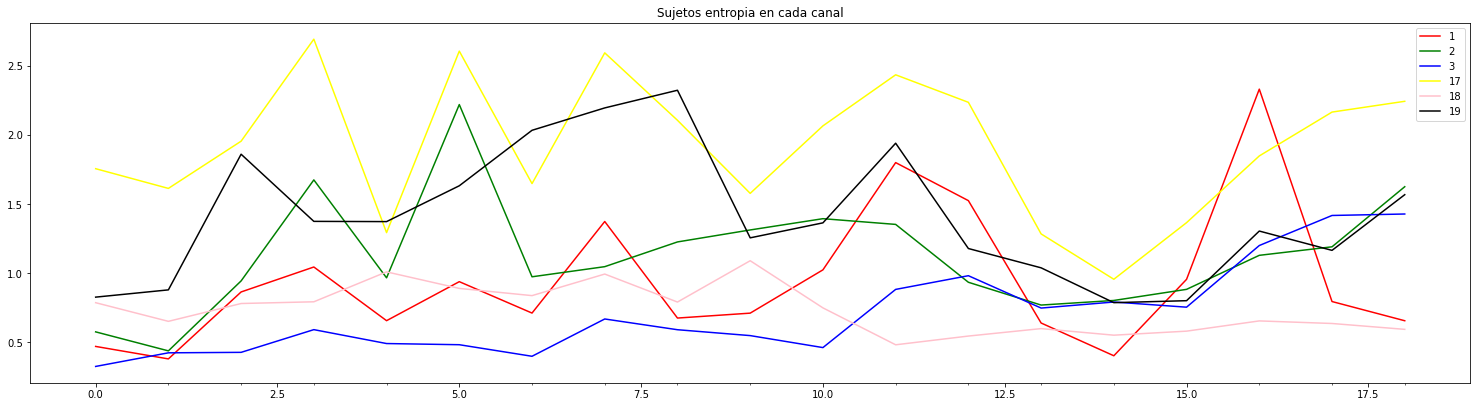

In [ ]:
# y_pos = np.arange(0,entropy_mc[0].shape[1],5)
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta","lime","firebrick","moccasin","cyan","violet","purple","darkseagreen","peru","salmon","rosybrowm"])
# colors = np.array(["oldlace","papayawhip","wheat","navajowhite","goldenrod","darkgoldenrod"])
X = np.arange(entropy_mc[0].shape[1])
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
tam = [0.00,0.15,0.30,0.45,0.60,0.75,1]
for s in range(len(entropy_mc)):
  # ax.bar(X + tam[s], temp[s], color = colors[s], width = 0.15,label=str(Subjects2[s]))
  ax.plot(temp[s],color = colors[s],label=str(Subjects2[s]))
# ax.title('Sujeto ')
ax.legend()
ax.set_title('Sujetos entropia en cada canal')
ax.set_xticks(X, tuple(channels))
plt.show()
# ax.set_yticks(np.arange(0, 81, 10))